In [643]:
import pandas as pd
import numpy as np
import re
import os

In [644]:
import matplotlib.pyplot as plt

In [645]:
import seaborn as sns

# TRAIN RESULTS

Estos son los resultados del entrenamiento (history). Está recogido el máximo valor de cada una de las métricas y de la loss (no sabemos que epoch es)

In [646]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max.csv'
df_train = pd.read_csv(path)

In [647]:
df_train = df_train.reset_index(drop = True)
index = [i for i in df_train.index if not bool(re.search('completo', df_train['name'][i]))]
df_train = df_train.iloc[index]

In [648]:
# df_train[df_train['modelo'] == 'EffNet3'].sort_values(['fine', 'lr', 'mask'])

In [649]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_train['name'])

In [650]:
print(len(modelos))
print(len(modelos_evaluados))

90
90


In [651]:
list(set(modelos)-set(modelos_evaluados))

[]

In [652]:
list(set(modelos_evaluados)-set(modelos))

[]

## Ploteo

In [653]:
y = 'val_auc'
data = df_train
lim = np.percentile(data[y], 20)

[(0.8533325433731078, 1.0)]

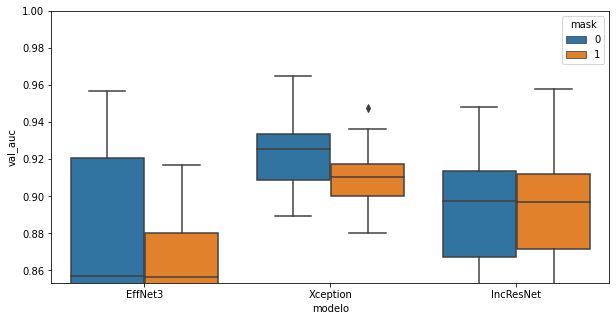

In [654]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731078, 1.0)]

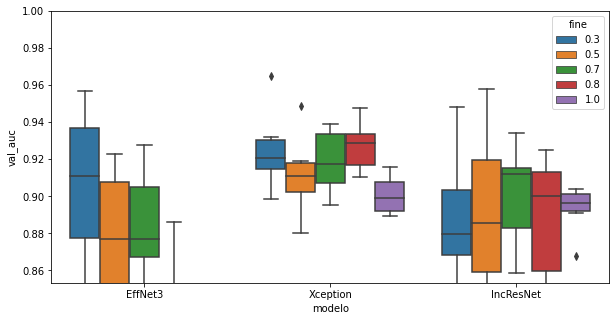

In [655]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731078, 1.0)]

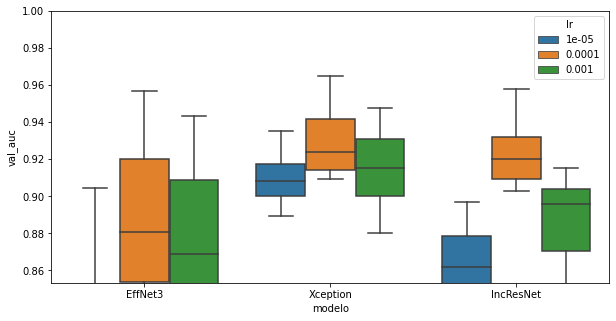

In [656]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731078, 1.0)]

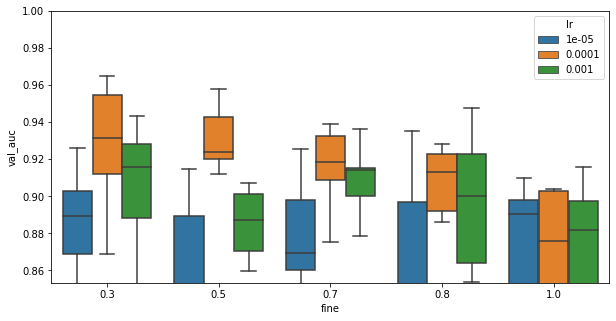

In [657]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731078, 1.0)]

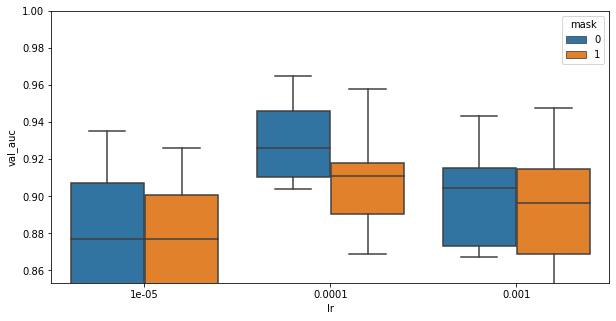

In [658]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST EVALUATION RESULTS

Estos son los resultados de aplicar model.evaluate() sobre el subset de X_train que he seleccionado para test.

In [659]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation.csv'
df_test = pd.read_csv(path)

### Modelos sin evaluar

In [660]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_test['nombre'])

In [661]:
print(len(modelos))
print(len(modelos_evaluados))

90
124


In [662]:
modelos_a_evaluar = list(set(modelos)-set(modelos_evaluados))
modelos_a_evaluar

[]

In [663]:
list(set(modelos_evaluados)-set(modelos))

['prueba_EffNet3_fine-07_batch-8_lr--05_auc-86_resto',
 'prueba_mask_EffNet3_fine-08_batch-8_lr-001_auc-85_resto',
 'prueba_Xception_fine-07_batch-8_lr-0001_auc-93_resto',
 'prueba_mask_Xception_fine-08_batch-8_lr-0001_auc-91_resto',
 'prueba_IncResNet_fine-03_batch-8_lr-0001_auc-94_resto',
 'prueba_EffNet3_fine-05_batch-8_lr-0001_auc-92_resto',
 'prueba_mask_EffNet3_fine-05_batch-8_lr-001_auc-85_resto',
 'prueba_Xception_fine-03_batch-8_lr-0001_auc-96_resto',
 'prueba_IncResNet_fine-08_batch-8_lr-0001_auc-91_resto',
 'prueba_EffNet3_fine-03_batch-8_lr-001_auc-94_resto',
 'prueba_EffNet3_fine-07_batch-8_lr-001_auc-91_resto',
 'prueba_IncResNet_fine-07_batch-8_lr-0001_auc-90_resto',
 'prueba_Xception_fine-07_batch-8_lr--05_auc-92_resto',
 'prueba_mask_EffNet3_fine-03_batch-8_lr-001_auc-91_resto',
 'prueba_EffNet3_fine-05_batch-8_lr--05_auc-83_resto',
 'prueba_mask_Xception_fine-05_batch-8_lr-0001_auc-91_resto',
 'prueba_EffNet3_fine-05_batch-8_lr-001_auc-89_resto',
 'prueba_Xception_fin

In [664]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

[]

## RESTO

In [665]:
index = [i for i in df_test.index if bool(re.search('resto', df_test['nombre'][i]))]
df_resto = df_test.iloc[index]

In [666]:
df_resto = df_resto.reset_index(drop = True)

In [667]:
df_resto['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_resto['nombre']))

In [668]:
df_resto['modelo'] = list(map(lambda x: re.split('_', x)[-6], df_resto['nombre']))
df_resto['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_resto['nombre']))
df_resto['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_resto['nombre']))
df_resto['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-5])[1], df_resto['nombre']))

In [669]:
df_resto

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
0,prueba_EffNet3_fine-05_batch-8_lr-0001_auc-92_...,0.522258,0.852604,0.790152,0.926065,False,EffNet3,0001,8,05
1,prueba_Xception_fine-08_batch-8_lr--05_auc-93_...,0.492753,0.861533,0.799576,0.936951,False,Xception,,8,08
2,prueba_mask_Xception_fine-08_batch-8_lr-0001_a...,0.580660,0.832953,0.758784,0.907422,True,Xception,0001,8,08
3,prueba_Xception_fine-07_batch-8_lr--05_auc-92_...,0.536018,0.848225,0.783377,0.925145,False,Xception,,8,07
4,prueba_Xception_fine-05_batch-8_lr--05_auc-91_...,0.594727,0.816369,0.734754,0.899587,False,Xception,,8,05
5,prueba_EffNet3_fine-07_batch-8_lr-001_auc-91_r...,0.608744,0.810349,0.733094,0.898770,False,EffNet3,001,8,07
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95_...,0.430632,0.872832,0.814099,0.950276,False,EffNet3,0001,8,03
7,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94_r...,0.449572,0.875653,0.822589,0.944469,False,EffNet3,001,8,03
8,prueba_mask_Xception_fine-07_batch-8_lr-0001_a...,0.554168,0.850051,0.781938,0.926042,True,Xception,0001,8,07
9,prueba_Xception_fine-08_batch-8_lr-0001_auc-92...,0.535678,0.842135,0.775260,0.918720,False,Xception,0001,8,08


### Ploteo

In [670]:
y = 'auc'
data = df_resto
lim = np.percentile(data[y], 20)

[(0.883945620059967, 1.0)]

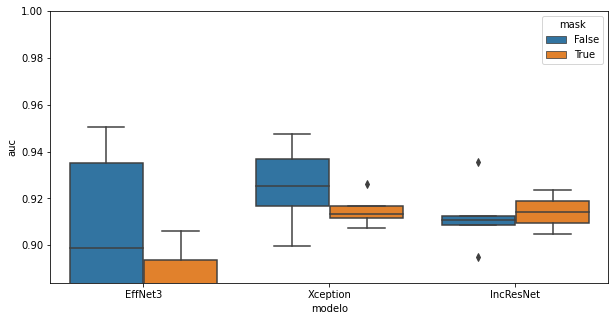

In [671]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.883945620059967, 1.0)]

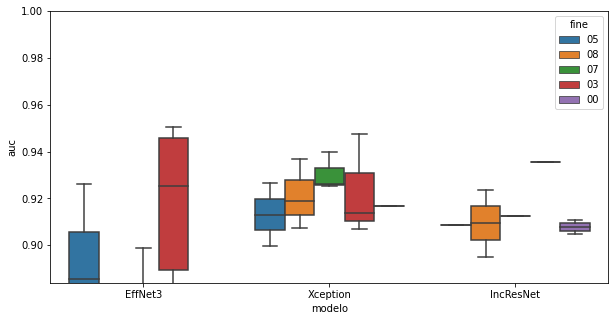

In [672]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.883945620059967, 1.0)]

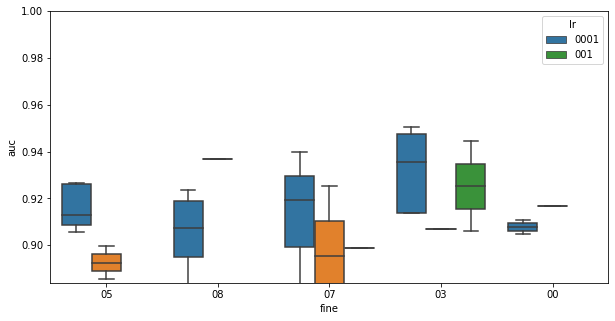

In [673]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.883945620059967, 1.0)]

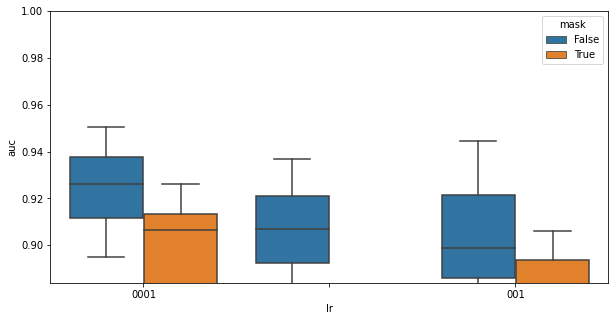

In [674]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

## SUBSET

In [675]:
index = list(set(df_test.index) - set(index))
df_test = df_test.iloc[index]

In [676]:
df_test = df_test.reset_index(drop = True)

In [677]:
df_test['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_test['nombre']))

In [678]:
df_test['modelo'] = list(map(lambda x: re.split('_', x)[-5], df_test['nombre']))
df_test['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df_test['nombre']))
df_test['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_test['nombre']))
df_test['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_test['nombre']))

In [679]:
df_test.sort_values('auc').tail()

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
35,prueba_Xception_fine-03_batch-8_lr-0001_auc-96,0.549459,0.848849,0.775202,0.928931,False,Xception,0001,8,03
10,prueba_Xception_fine-07_batch-8_lr-0001_auc-93,0.485459,0.848849,0.786164,0.930917,False,Xception,0001,8,07
4,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,0.488490,0.863196,0.803296,0.931229,False,EffNet3,001,8,03
59,prueba_Xception_fine-08_batch-8_lr-001_auc-92,0.525883,0.861862,0.796954,0.931729,False,Xception,001,8,08
3,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.436792,0.871204,0.813075,0.945697,False,EffNet3,0001,8,03


### Ploteo

In [680]:
y = 'auc'
data = df_test
lim = np.percentile(data[y], 20)

[(0.8383310437202454, 1.0)]

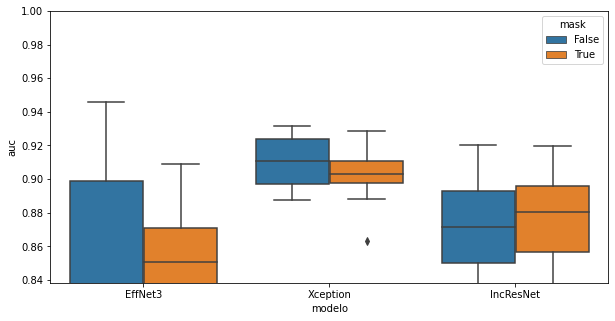

In [681]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8383310437202454, 1.0)]

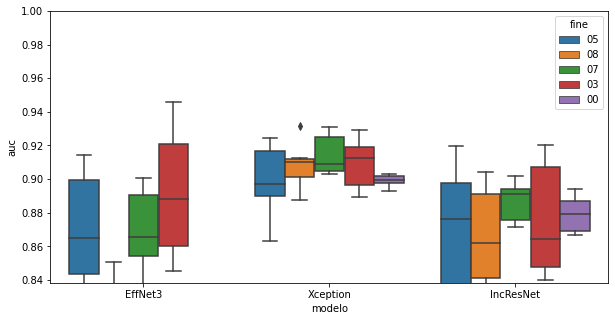

In [682]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.7, 1.0)]

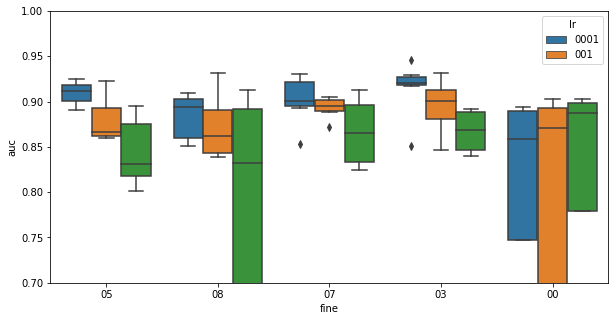

In [683]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(0.7, 1))

[(0.8383310437202454, 1.0)]

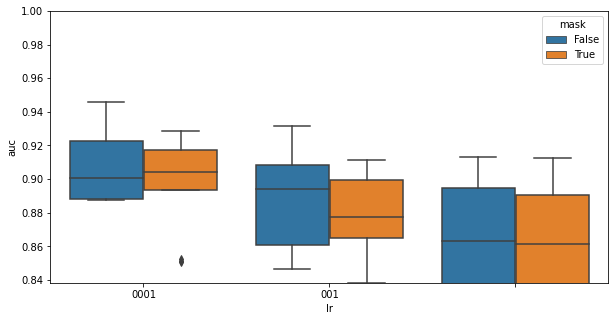

In [684]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST PREDICTION METRICS

Estos son los resultados de aplicar model.predict() sobre el subset de X_train que he seleccionado para test. Sobre las predicciones se calculan unas métricas personalizadas

In [729]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics.csv'
df = pd.read_csv(path)

### Modelos sin evaluar

In [730]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df['name'])

In [731]:
print(len(modelos))
print(len(modelos_evaluados))

90
124


In [732]:
modelos_a_evaluar = list(set(modelos)-set(modelos_evaluados))
modelos_a_evaluar

[]

In [733]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

[]

## RESTO

In [734]:
index = [i for i in df.index if bool(re.search('resto', df['name'][i]))]
df_resto = df.iloc[index]

In [735]:
df_resto = df_resto.reset_index(drop = True)

In [736]:
df_resto['auc_mean'] = (df_resto['auc_0']+df_resto['auc_1']+df_resto['auc_2'])/3

In [737]:
df_resto.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"accuracy_score[0, 1]","f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean
28,prueba_IncResNet_fine-03_batch-8_lr-0001_auc-9...,0.973614,0.771123,0.698279,0.773190,0.893377,0.173651,0.085862,0.395070,0.933973,...,0.740208,0.779642,0.882383,0.750886,0.750886,0.892484,0.891699,0.893427,0.893427,0.933655
7,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94_r...,0.974926,0.391551,0.364874,0.346703,0.897896,0.325556,0.318853,0.457360,0.929047,...,0.753949,0.740555,0.879674,0.705830,0.705830,0.881764,0.884650,0.879584,0.879584,0.933956
32,prueba_Xception_fine-03_batch-8_lr-0001_auc-96...,0.979880,0.414729,0.364114,0.530843,0.902144,0.258009,0.153467,0.543801,0.929051,...,0.754462,0.785556,0.880504,0.757970,0.757970,0.883830,0.882118,0.886908,0.886908,0.937025
13,prueba_Xception_fine-07_batch-8_lr-0001_auc-93...,0.982743,0.298095,0.273896,0.338365,0.904439,0.253418,0.185119,0.366078,0.924378,...,0.757645,0.706673,0.880027,0.668235,0.668235,0.831298,0.871358,0.815175,0.815175,0.937187
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95_...,0.986002,0.373820,0.373820,0.427705,0.916031,0.160859,0.132412,0.306705,0.934488,...,0.771060,0.725724,0.880094,0.689197,0.689197,0.862553,0.888442,0.851828,0.851828,0.945507


In [738]:
df_resto.name.iloc[3]

'prueba_Xception_fine-07_batch-8_lr--05_auc-92_resto'

In [739]:
df_resto['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_resto['name']))

In [740]:
df_resto['modelo'] = list(map(lambda x: re.split('_', x)[-6], df_resto['name']))
df_resto['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_resto['name']))
df_resto['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_resto['name']))
df_resto['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-5])[1], df_resto['name']))

In [741]:
df_resto['auc_mean'] = (df_resto['auc_0']+df_resto['auc_1']+df_resto['auc_2'])/3

### Ploteo

In [747]:
y = 'auc_mean'
data = df_resto
lim = np.percentile(data[y], 20)

[(0.8771935382490463, 1.0)]

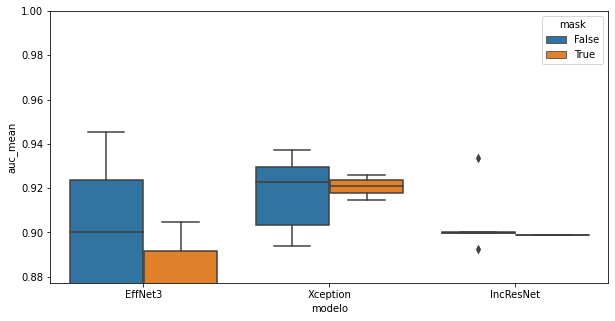

In [748]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8771935382490463, 1.0)]

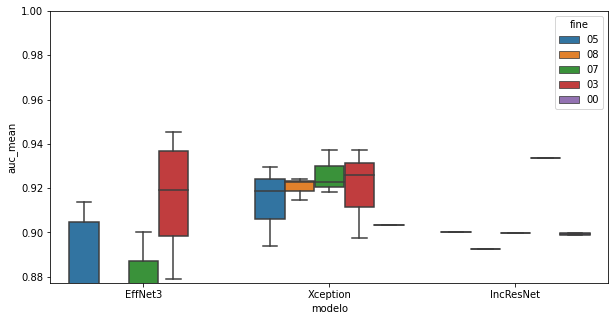

In [749]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8771935382490463, 1.0)]

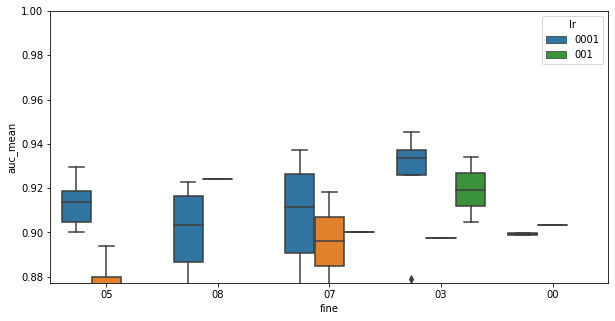

In [750]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8771935382490463, 1.0)]

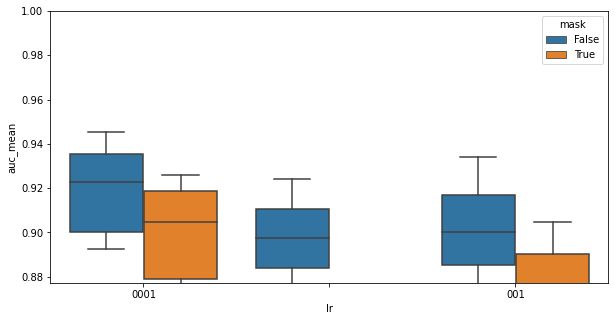

In [751]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

## SUBSET

In [752]:
df = df.reset_index(drop = True)

In [753]:
index = list(set(df.index) - set(index))
df = df.iloc[index]

In [754]:
df['mask'] = list(map(lambda x: bool(re.search('mask', x)), df['name']))

In [755]:
df['modelo'] = list(map(lambda x: re.split('_', x)[-5], df['name']))
df['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df['name']))
df['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df['name']))
df['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df['name']))

In [756]:
df['auc_mean'] = (df['auc_0']+df['auc_1']+df['auc_2'])/3

In [757]:
df.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",mask,modelo,lr,batch,fine,auc_mean
36,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,0.974515,0.066946,0.066946,0.110425,0.872377,0.057974,0.049864,0.544718,0.930372,...,0.856353,0.859571,0.854855,0.854855,True,IncResNet,0001,8,05,0.925755
59,prueba_Xception_fine-08_batch-8_lr-001_auc-92,0.982717,0.196502,0.331068,0.138229,0.873779,0.382627,0.135059,0.590140,0.923374,...,0.842979,0.842476,0.843844,0.843844,False,Xception,001,8,08,0.926623
22,prueba_mask_Xception_fine-03_batch-8_lr-0001_a...,0.977626,0.079139,0.098225,0.109531,0.877251,0.567552,0.562125,0.666493,0.942451,...,0.875634,0.876968,0.877878,0.877878,True,Xception,0001,8,03,0.932443
34,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.975083,0.455335,0.673091,0.626435,0.878748,0.110022,0.026167,0.206303,0.943782,...,0.807455,0.859248,0.801802,0.801802,True,IncResNet,0001,8,03,0.932538
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.991293,0.122462,0.366291,0.366291,0.893384,0.219937,0.219937,0.366731,0.931752,...,0.855620,0.865743,0.852853,0.852853,False,EffNet3,0001,8,03,0.938810


In [758]:
df.name.iloc[22]

'prueba_mask_Xception_fine-03_batch-8_lr-0001_auc-91'

In [759]:
df.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'mask', 'modelo', 'lr', 'batch', 'fine',
       'auc_mean'],
      dtype='object')

### Ploteo

In [760]:
y = 'auc_mean'
data = df
lim = np.percentile(data[y], 10)

[(0.7950488025563102, 1.0)]

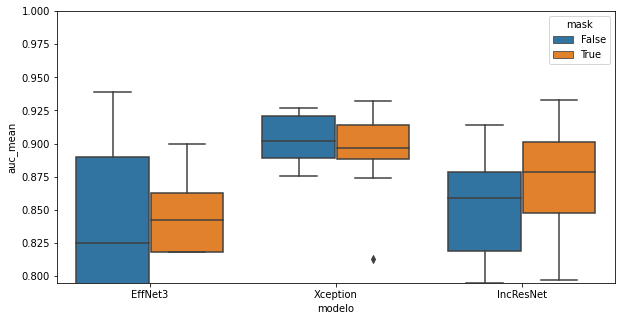

In [761]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7950488025563102, 1.0)]

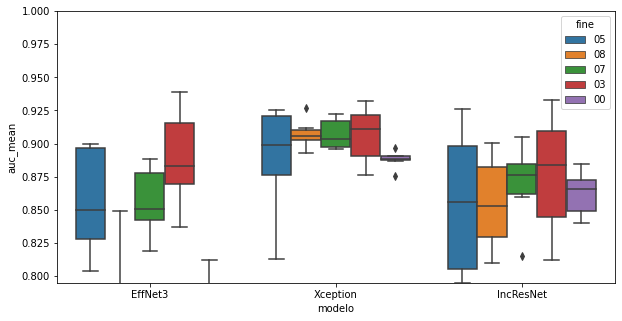

In [762]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.7950488025563102, 1.0)]

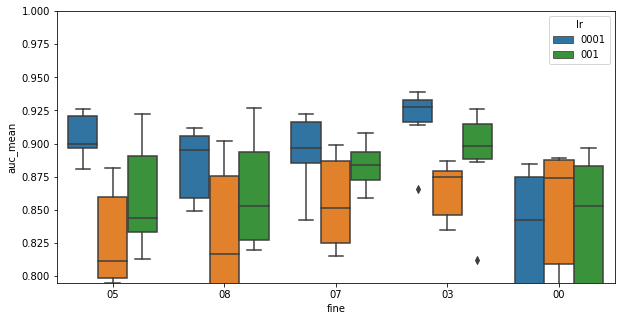

In [763]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.7950488025563102, 1.0)]

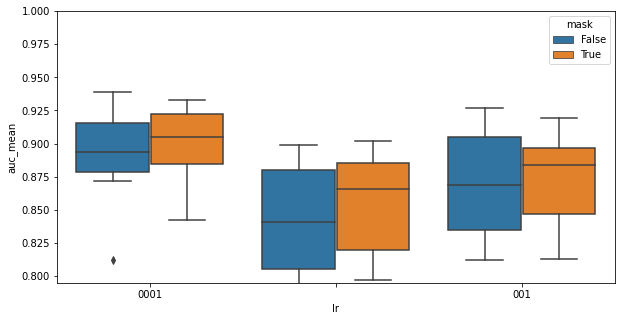

In [764]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

## Cada modelo

In [248]:
import os
import cv2
import json

In [437]:
model_name = 'prueba_Xception_fine-07_batch-8_lr--05_auc-92_resto'

In [438]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [439]:
os.listdir(p)

['metricas.json',
 'pred_rec_plot_0.png',
 'auc_plot_0.png',
 'pr_re_th_plot_0.png',
 'pred_rec_plot_1.png',
 'auc_plot_1.png',
 'pr_re_th_plot_1.png',
 'pred_rec_plot_2.png',
 'auc_plot_2.png',
 'pr_re_th_plot_2.png',
 'class_report.csv']

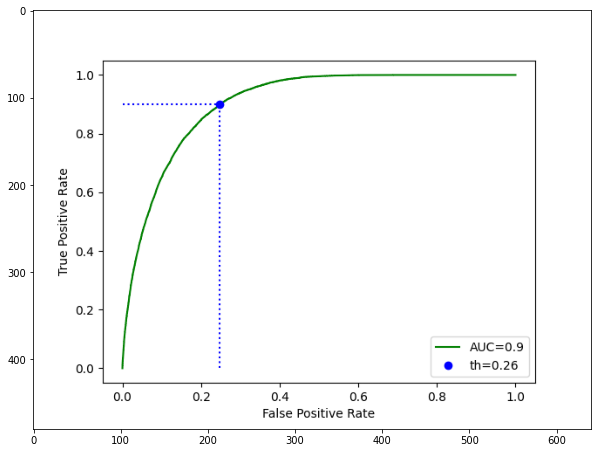

In [448]:
img = cv2.imread(os.path.join(p, 'auc_plot_2.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [427]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

{'auc_0': 0.9776262749235721,
 'younden_0': 0.07913895696401596,
 'pr_max_0': 0.09822488576173782,
 'pr_cut_0': 0.10953118652105331,
 'auc_1': 0.8772511249988728,
 'younden_1': 0.5675524473190308,
 'pr_max_1': 0.5621252655982971,
 'pr_cut_1': 0.6664933562278748,
 'auc_2': 0.9424514604694785,
 'younden_2': 0.35767167806625366,
 'pr_max_2': 0.4270825684070587,
 'pr_cut_2': 0.40276503562927246,
 'f1_score_0': 0.895381516318209,
 'precision_score_0': 0.9087244446850359,
 'recall_score_0': 0.8998998998998999,
 'accuracy_score_0': 0.8998998998998999,
 'f1_score_1': 0.7897474059147652,
 'precision_score_1': 0.8219673769382033,
 'recall_score_1': 0.7837837837837838,
 'accuracy_score_1': 0.7837837837837838,
 'f1_score_2': 0.8756344940842757,
 'precision_score_2': 0.876968179082455,
 'recall_score_2': 0.8778778778778779,
 'accuracy_score_2': 0.8778778778778779,
 'f1_score[0, 1]': 0.5503507338667303,
 'precision_score[0, 1]': 0.7949024702719284,
 'recall_score[0, 1]': 0.5665665665665666,
 'accura

In [436]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.975510,0.717718,0.826990,333.0
1,moderado,0.626350,0.870871,0.728643,333.0
2,severo,0.862543,0.753754,0.804487,333.0
3,micro avg,0.780781,0.780781,0.780781,999.0
4,macro avg,0.821468,0.780781,0.786707,999.0
5,weighted avg,0.821468,0.780781,0.786707,999.0
6,samples avg,0.780781,0.780781,0.780781,999.0
